#**Fase 3**
Ana Vivar Rojas   A01798128

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import numpy as np

tiempo_lim = 30     # límite de tiempo
presas = []         # array para evolución temporal número de presas
depred = []         # array para evolución temporal número de depredadores
tiempo = []
pp = 50.0           # número inicial de presas
dd = 100.0          # número inicial de depredadores

##constantes para calcular los rates

c1=1.0
c2=0.005
c3=0.6

currTime=0          # tiempo actual
t0 = 0

while (currTime < tiempo_lim):
  # a)
  if (pp > 0) & (dd > 0):
    rate1 = c1*pp
    rate2 = c2*pp*dd
    rate3 = c3*dd
    rate = rate1 + rate2 + rate3
    p1 = rate1/rate
    p2 = rate2/rate
    p3 = rate3/rate

    t = np.random.exponential(1/rate)

    ganador = np.random.multinomial(1,[p1,p2,p3])

    if ganador[0] == 1:
      pp += 1
      presas.append(pp)
      depred.append(dd)

    if ganador[1] == 1:     # p2 gana
      pp -= 1
      dd += 1
      presas.append(pp)
      depred.append(dd)
          
    if (ganador[2] == 1):   #p3 gana
      dd -= 1
      presas.append(pp)
      depred.append(dd)

    currTime += t
    tiempo.append(currTime)

  # proceso b)
  if (pp > 0) & (dd == 0):
    rate = c1*pp
    t = np.random.exponential(1/rate)

    pp += 1
    presas.append(pp)
    depred.append(dd)

    currTime += t
    tiempo.append(currTime)

  # c)
  if ((pp == 0) & (dd > 0)):
    rate = c3*dd
    t = np.random.exponential(1/rate)

    dd -= 1

    presas.append(pp)
    depred.append(dd)

    currTime += t
    tiempo.append(currTime)

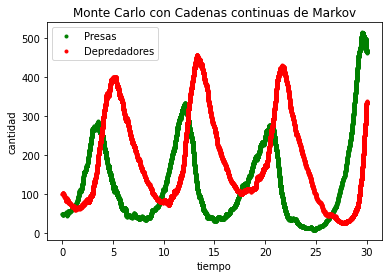

In [17]:
plt.plot(tiempo, presas, '.', label=r'Presas', color = 'g')
plt.plot(tiempo, depred,'.', label=r'Depredadores', color = 'r')
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title("Monte Carlo con Cadenas continuas de Markov")
plt.legend(loc='best')
plt.show()

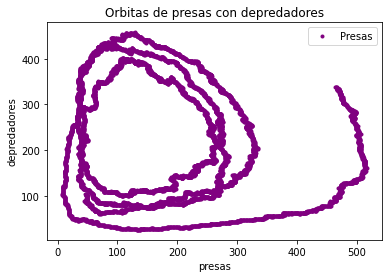

In [18]:
plt.plot(presas, depred, '.', label=r'Presas', color = 'purple')
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.title("Orbitas de presas con depredadores")
plt.legend(loc='best')
plt.show()